# Convolution

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [MNIST images](http://yann.lecun.com/exdb/mnist/). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.

This document was in Apache License 2.0, and modified for NCCU teaching.


In [1]:
# @title
import datetime
print(datetime.datetime.now())

2024-04-09 03:45:08.102687


In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

# MNIST dataset


The MNIST dataset contains 70,000 images in 10 classes, with 7,000 images in each class. The dataset is divided into 60,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

11490434/11490434 [==============================] - 2s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


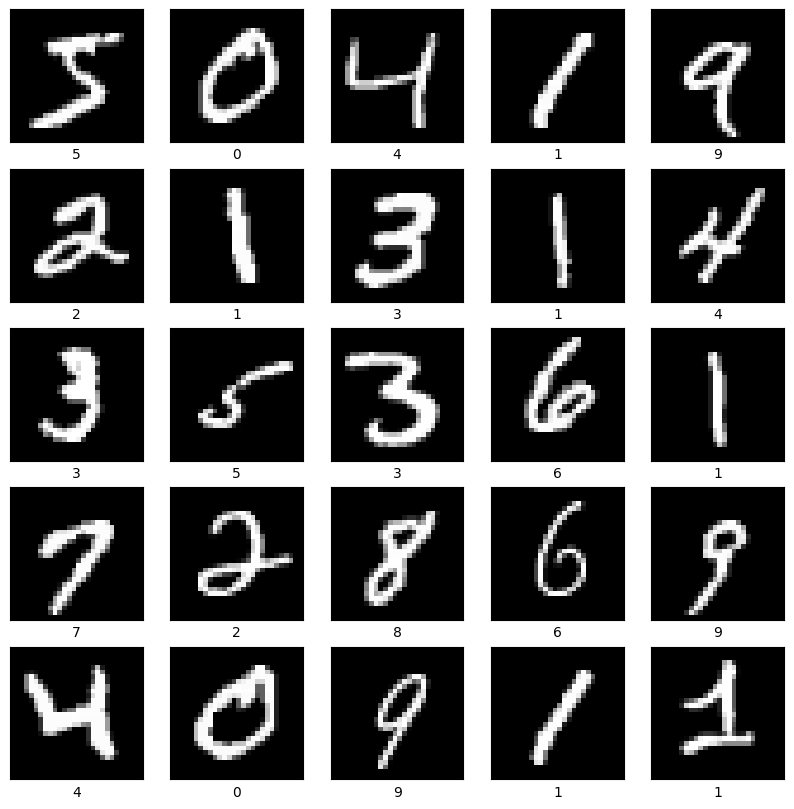

In [4]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = "gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
import numpy as np
np.set_printoptions(precision=2)
print(train_images[0])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.07
  0.07 0.07 0.49 0.53 0.69 0.1  0.65 1.   0.97 0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.12 0.14 0.37 0.6  0.67 0.99
  0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.   0.   0.   0

# Convolution Concept

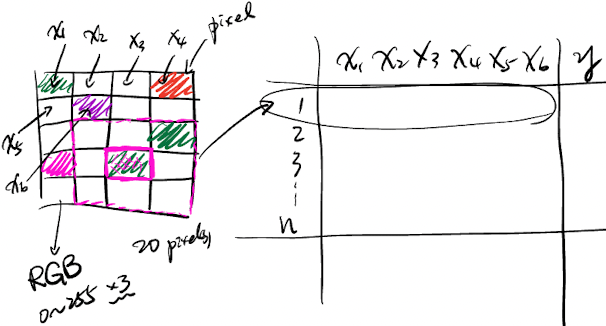

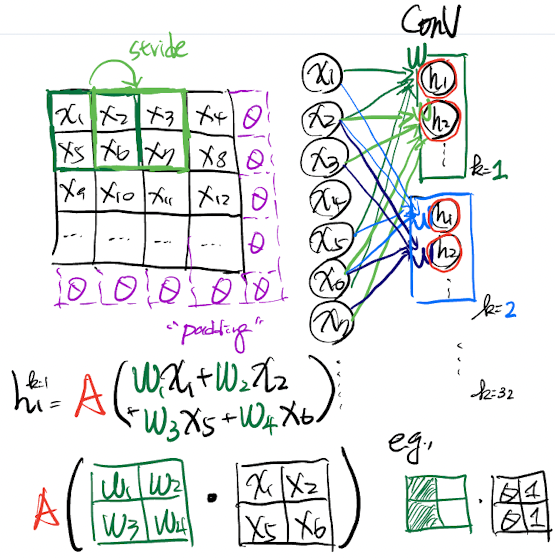

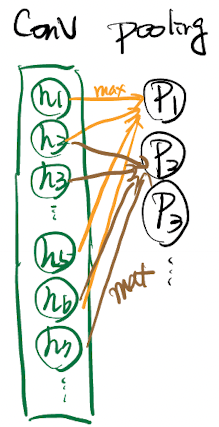

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.


Conv2D expects 4 dimensional data (BatchSize, Channel, Width, Height). Convolutional layers require a number of input channels. For an RBG image, that number is 3 and for greyscale images, the number of channels is 1.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. You can do this by passing the argument `input_shape` to your first layer.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(
    filters = 32, # must have
    kernel_size = (3, 3), # must have
    strides = (1, 1),  # default (1,1)
    padding='same', # "valid" means no padding; "same" results in padding
    activation = 'relu', # optional, default 'None'
    input_shape = (28, 28, 1),
    name = "1st_conv2d",
    ))
model.add(layers.MaxPooling2D(
    pool_size = (2, 2), # window size over which to take the maximum
    strides = None, #  how far the pooling window moves for each pooling step, If None, it will default to pool_size.
    padding = 'same',
    name = "1st_maxpool",
    ))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name = "2nd_conv2d"))
model.add(layers.MaxPooling2D((2, 2), padding = 'same', name = "2nd_maxpool"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_conv2d (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 1st_maxpool (MaxPooling2D)  (None, 14, 14, 32)        0         
                                                                 
 2nd_conv2d (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 2nd_maxpool (MaxPooling2D)  (None, 7, 7, 64)          0         
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. MNIST has 10 output classes, so you use a final Dense layer with 10 outputs.

In [8]:
model.add(layers.Flatten(name = 'flatten'))
model.add(layers.Dense(128, activation='relu', name = 'fc'))
model.add(layers.Dense(10, name = 'output'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_conv2d (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 1st_maxpool (MaxPooling2D)  (None, 14, 14, 32)        0         
                                                                 
 2nd_conv2d (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 2nd_maxpool (MaxPooling2D)  (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc (Dense)                  (None, 128)               401536    
                                                                 
 output (Dense)              (None, 10)                1

The network summary shows that (7, 7, 64) outputs were flattened into vectors of shape (3136) before going through two Dense layers.

This network looks like https://towardsdatascience.com/af5fafbc35e9

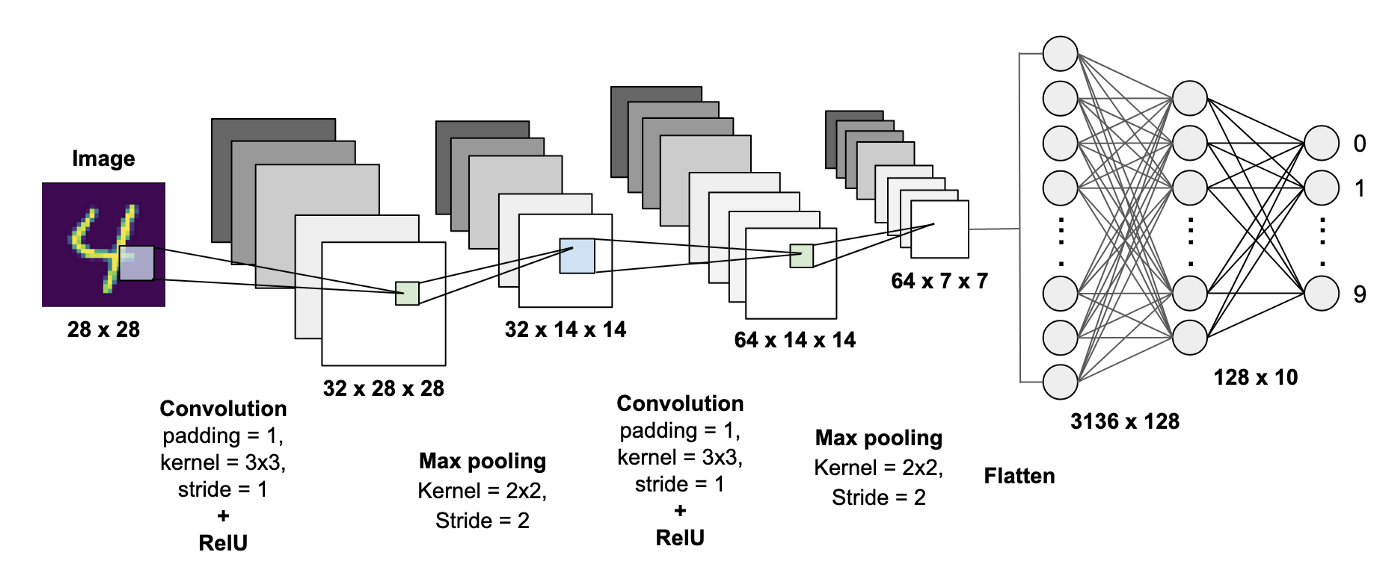

### Compile and train the model

Note: you MUST understand the difference between 'SparseCategoricalCrossentropy', 'BinaryCrossentropy', 'CategoricalCrossentropy' !!!

* **SparseCategoricalCrossentropy**: input the label's index, i.e., an integer.
* **CategoricalCrossentropy**: input one-hot encoded target (it can support multiple labels)
* **BinaryCrossentropy**: input [0.0 1.0]


**from_logits**: If the last layer is **NOT** 'softmax' or 'sigmoid', then the output value will **NOT** be transfered to [0.0, 1.0]. In this case, your last layer is called 'logits', so you must set the **from_logits** in the loss function to True for your classification NN.

If you have manually added 'softmax' or 'sigmoid' as your last layer, then you MUST set **from_logits** to False. The default from_logits value is False.


All metrics are here.
https://www.tensorflow.org/api_docs/python/tf/keras/metrics



In [10]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits = True), # because softmax is not added in the model, so 'Ture' will do softmax for you.
              metrics = ['acc'])

epochs = 5

history = model.fit(
    x = train_images,
    y = train_labels,
#    batch_size = 32, # If unspecified, batch_size will default to 32.
    epochs = epochs, # default 1, an epoch is an iteration over the entire data
    validation_split = 0.1,
    # validation_data = (x_val, y_val), # if you have another validation dataset
    )

Epoch 1/5
1688/1688 [==============================] - 11s 4ms/step - loss: 0.1346 - acc: 0.9579 - val_loss: 0.0412 - val_acc: 0.9897
Epoch 2/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0352 - val_acc: 0.9895
Epoch 3/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0293 - acc: 0.9903 - val_loss: 0.0317 - val_acc: 0.9910
Epoch 4/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0303 - val_acc: 0.9923
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0331 - val_acc: 0.9905


### Evaluate the model

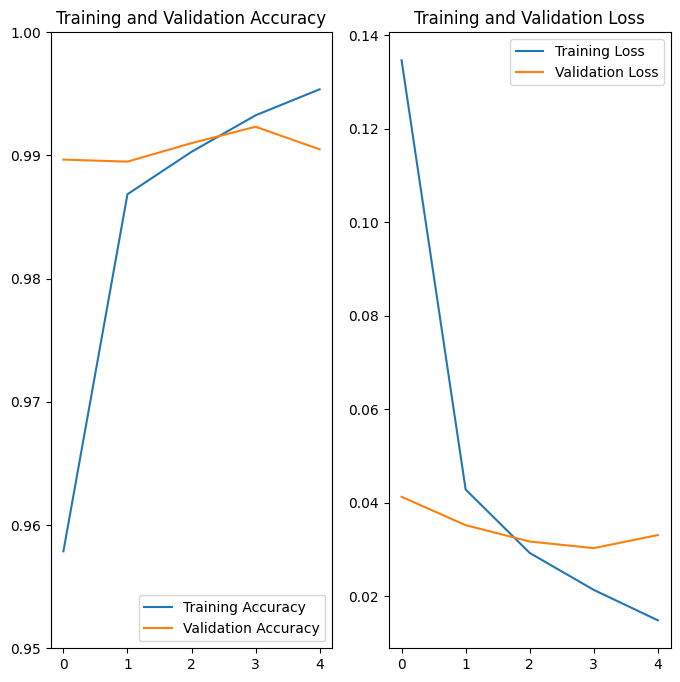

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim(0.95, 1.00)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

results = dict()
results['model'] = test_acc

313/313 - 1s - loss: 0.0333 - acc: 0.9899 - 531ms/epoch - 2ms/step
0.9898999929428101


### Prediction

Text(0.5, 0, '4')

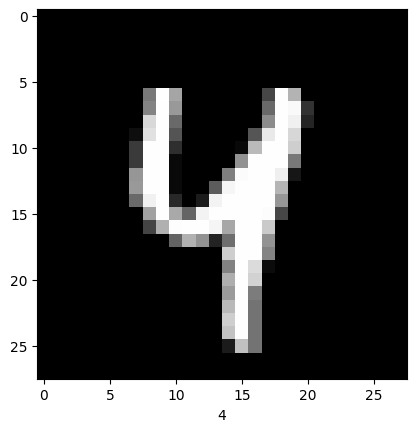

In [13]:
plt.imshow(test_images[42], cmap = "gray")
plt.xlabel(class_names[test_labels[42]])

In [14]:
pred_y = model.predict(test_images[42].reshape(-1, 28, 28, 1))

tf.nn.softmax(pred_y)

1/1 [==============================] - 0s 225ms/step


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.11e-11, 1.83e-07, 8.59e-10, 2.59e-09, 9.99e-01, 1.14e-07,
        1.50e-11, 9.01e-07, 4.03e-08, 5.71e-04]], dtype=float32)>

Your simple CNN has achieved a test accuracy of over 98%. Not bad for a few lines of code!


NOTE: You may increase epochs to a larger number, say 100. Now you can see the curve of 'train_acc' and 'val_acc' may change.


# Overfitting

The difference in accuracy between training and validation accuracy is noticeable — a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples — to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll add Dropout to your model, and learn 'early-stop'.



## Shuffle

Shuffle the Data, by using shuffle=True in model.fit.


In [15]:
# model2.fit(train_images, train_labels,
#            shuffle = True, validation_split = 0.1)

## Dropout

In [16]:
model2 = models.Sequential([
  layers.Conv2D(32, (3, 3),
                padding='same', activation='relu',
                input_shape = (28, 28, 1),
                name = "1stConv"),
  layers.MaxPooling2D((2, 2), padding = 'same'),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2), # !!!!!!!!!
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10)
])

model2.compile(optimizer = 'adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics=['acc'])

epochs2 = 20

history2 = model2.fit(train_images, train_labels,
                      epochs = epochs2, # !!!!!!!!!
                      validation_split = 0.1)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1418 - acc: 0.9554 - val_loss: 0.0451 - val_acc: 0.9877
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0481 - acc: 0.9853 - val_loss: 0.0381 - val_acc: 0.9887
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0353 - val_acc: 0.9898
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0267 - acc: 0.9911 - val_loss: 0.0364 - val_acc: 0.9892
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0367 - val_acc: 0.9910
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0174 - acc: 0.9941 - val_loss: 0.0320 - val_acc: 0.9920
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0394 - val_acc: 0.9897
Epoch 8/20
1688/1688 [==============================] - 6s 4ms

After applying tf.keras.layers.Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.

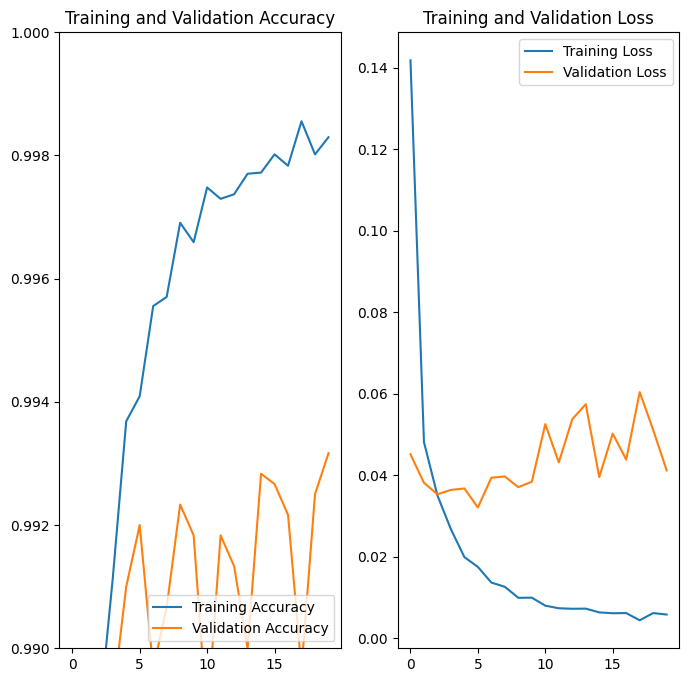

In [17]:
epochs_range = range(epochs2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history2.history['acc'], label='Training Accuracy')
plt.plot(epochs_range, history2.history['val_acc'], label='Validation Accuracy')
plt.ylim(0.99, 1.00)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history2.history['loss'], label='Training Loss')
plt.plot(epochs_range, history2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

results['dropout'] = test_acc

313/313 - 1s - loss: 0.0321 - acc: 0.9925 - 556ms/epoch - 2ms/step
0.9925000071525574


In [21]:
import pandas as pd
pd.DataFrame(results, index = ['acc']).T

,acc
model,0.9899
dropout,0.9925


## Early Stop

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [22]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_acc', # default 'loss', you may try 'acc', 'val_acc', ...
    min_delta = 0.0005, # minimum change of 'monitor' to qualify as an improvementess.
    patience = 3, # epochs with no improvement after which training will be stopped.
    )

history3 = model2.fit(train_images, train_labels,
                      epochs = epochs2,
                      callbacks=[callback],
                      validation_split = 0.1,
                      )

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.0546 - val_acc: 0.9920
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0043 - acc: 0.9984 - val_loss: 0.0542 - val_acc: 0.9932
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0052 - acc: 0.9983 - val_loss: 0.0592 - val_acc: 0.9923
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0603 - val_acc: 0.9930
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0043 - acc: 0.9984 - val_loss: 0.0543 - val_acc: 0.9930


In [23]:
print("Stop at epoch", len(history3.history['loss']))
print("Epoch is set to", epochs2)

Stop at epoch 5
Epoch is set to 20


In [24]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

results['earlystop'] = test_acc

313/313 - 1s - loss: 0.0446 - acc: 0.9916 - 538ms/epoch - 2ms/step
0.991599977016449


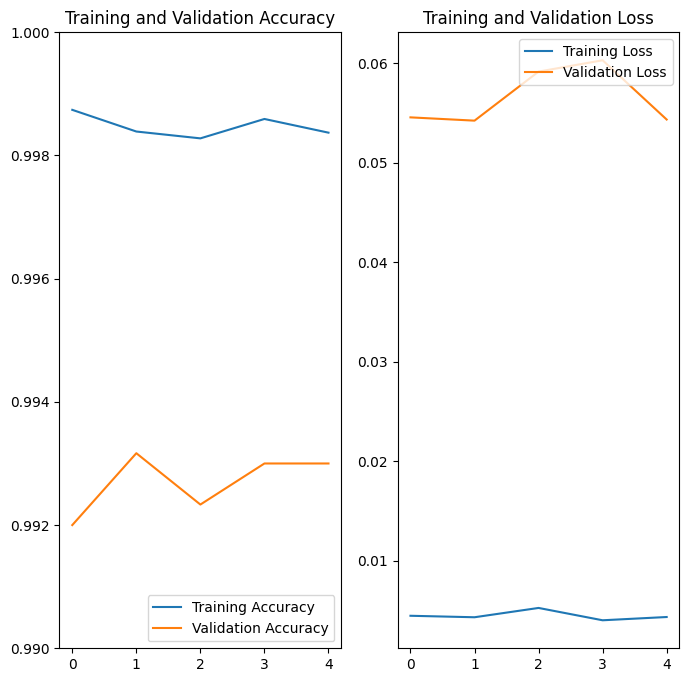

In [25]:
epochs_range = range(len(history3.history['loss'])) # <--- !!!!

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history3.history['acc'], label='Training Accuracy')
plt.plot(epochs_range, history3.history['val_acc'], label='Validation Accuracy')
plt.ylim(0.99, 1.00)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history3.history['loss'], label='Training Loss')
plt.plot(epochs_range, history3.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
pd.DataFrame(results, index = ['acc']).T

,acc
model,0.9899
dropout,0.9925
earlystop,0.9916


## More about a layer

For example, a Conv2D has lots of parameters. You should understand what they are to improve your model.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [ ]:
'''
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',  # Initializer for the kernel weights matrix
    bias_initializer='zeros',             # Initializer for the bias vector
    kernel_regularizer=None,              # Regularizer function applied to the kernel weights matrix
    bias_regularizer=None,                # Regularizer function applied to the bias vector
    activity_regularizer=None,            # Regularizer function applied to the output of the layer
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
'''

### initializer

https://www.tensorflow.org/api_docs/python/tf/keras/initializers


* glorot_uniform: Xavier Normal
* RandomNormal
* RandomUniform
* Zeros
* Ones

Question: what if you use "Zeros" as the init weights? Does back-propagation/gradient descent still work? (Yes, but why?)

https://chih-sheng-huang821.medium.com/f264c4be37f5


https://zhuanlan.zhihu.com/p/25110150

### regularizer

https://www.tensorflow.org/api_docs/python/tf/keras/regularizers

* L1: A regularizer that applies a L1 regularization penalty.
* L1L2: A regularizer that applies both L1 and L2 regularization penalties.
*  L2: A regularizer that applies a L2 regularization penalty.


### intermediated layer

In [27]:
# weight
w = model.get_layer('1st_conv2d').get_weights()[0]
print(w.shape)
# Bias
b = model.get_layer('1st_conv2d').get_weights()[1]
print(b.shape)

(3, 3, 1, 32)
(32,)


In [28]:
k = 8
print(w[:,:,0,k]) # 0: only 1 channel, k: the kth kernel

[[-0.13 -0.05 -0.04]
 [ 0.18  0.11  0.04]
 [-0.02 -0.09  0.04]]


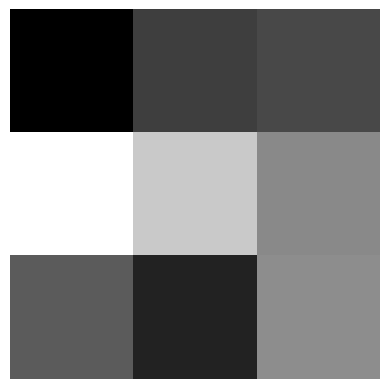

In [29]:
plt.imshow(w[:,:,0,k], cmap = "gray")
plt.xlabel('k = ' + str(k))
plt.axis('off')
plt.show()

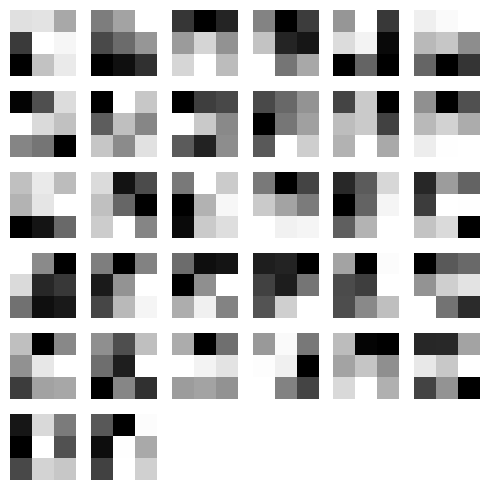

In [30]:
rows = 6
cols = 6
axes=[]
fig=plt.figure(figsize=(5,5))

for k in range(rows*cols):
  if k < w.shape[3]:
    b = w[:,:,0,k]
    axes.append( fig.add_subplot(rows, cols, k+1) )
    plt.axis('off')
    plt.imshow(b, cmap = "gray")
fig.tight_layout()
plt.show()

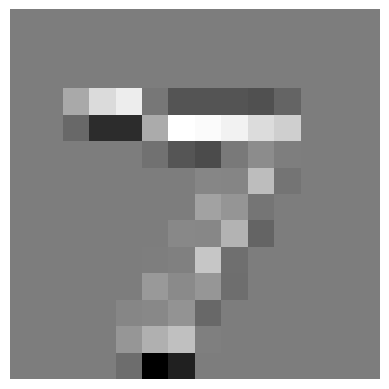

The test image 0 pass the 8 kernel (filter).


In [31]:
test = 0 # <---- Try this !!!!
k = 8 # <---- Try this !!!!

r = tf.nn.conv2d(test_images[test].reshape(-1, 28, 28, 1), w[:,:,:,[k]], strides = (2,2), padding = "SAME")
plt.imshow(r[0,:,:,0], cmap = "gray")
plt.axis('off')
plt.show()
print("The test image", test,"pass the", k, "kernel (filter).")

https://en.wikipedia.org/wiki/Kernel_(image_processing)

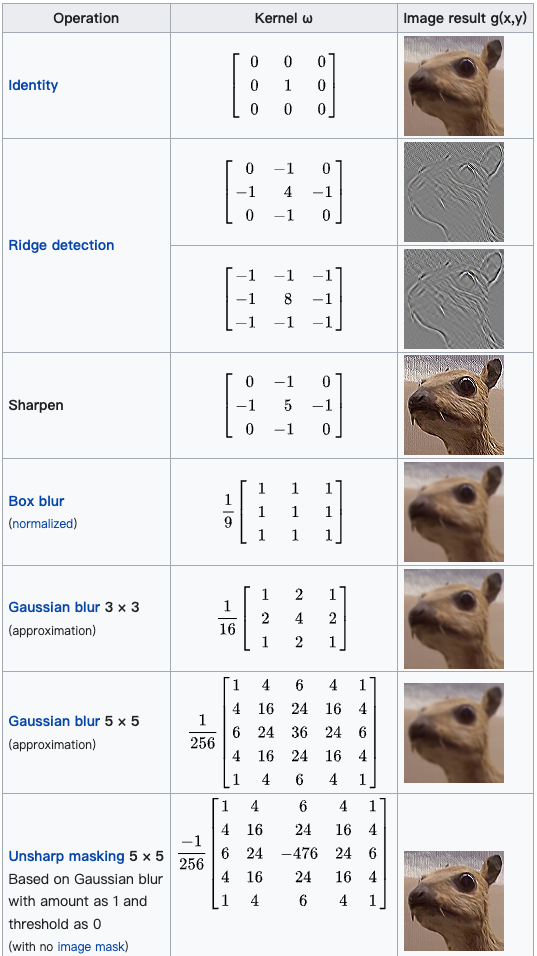

# Ref: Deep Learning and Information Theory

https://arxiv.org/abs/1503.02406

https://medium.com/mlearning-ai/deep-learning-meets-information-theory-part-i-c6a56a2ec29c